# EVALUATION PROJECT 6 - LOAN APPLICATION STATUS PREDICTION
# NAME - SUBHAM 
# BATCH - DS2401

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv',
               names=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income',
                      'Co_Applicant_income','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# column -> Applicant_Income , Loan_Amount are in dollars
# column -> Loan_Amount_Term are in days (meaning 360 means 360 days meaning 1 year)
# column -> Credit_History (1 meaning previously the applicant has repayed their debts and 0 means applicant didn't pay 
# their debts
# other columns mean literally as thier names mean 

In [7]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [5]:
df.shape
# there are 614 rows and 13 columns

(614, 13)

In [6]:
df.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
Applicant_Income         int64
Co_Applicant_income    float64
Loan_Amount            float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
dtype: object

In [ ]:
# columns -> Co_Applicant_Income , Loan_Amount , Credit_History are of float datatype. 
# column -> Applicant_Income is of int datatype
# other columns -> are of object datatype

In [38]:
df['Credit_History']=df['Credit_History'].astype(str)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(str)
# changing these into str so as to take mode of their values to replace with null values

In [15]:
df.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
Applicant_Income         int64
Co_Applicant_income    float64
Loan_Amount            float64
Loan_Amount_Term        object
Credit_History          object
Property_Area           object
Loan_Status             object
dtype: object

In [8]:
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
Applicant_Income        0
Co_Applicant_income     0
Loan_Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [39]:
# finding mean for columns having float datatype and mode for columns having object datatype 
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].mode())
        print('\n')
    elif df[i].dtypes=='float64':
        print(df[i].mean())
        print('\n')
    else:
        df[i].dtypes=='int64'
        print(df[i].mean())
        print('\n')

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object


0    Male
Name: Gender, dtype: object


0    Yes
Name: Married, dtype: object


0    0
Name: Dependents, dtype: object


0    Graduate
Name: Education, dtype: object


0    No
Name: Self_Employed, dtype: object


5403.459283387622


1621.2457980271008


146.41216216216216


0    360.0
Name: Loan_Amount_Term, dtype: object


0    1.0
Name: Credit_History, dtype: object


0    Semiurban
Name: Property_Area, dtype: object


0    Y
Name: Loan_Status, dtype: object




In [40]:
# filling NaN values with mode if datatype is object and mean if datatype is mean
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Loan_Amount'].fillna(146.41216216216216,inplace=True)
df['Loan_Amount_Term'].fillna('360.0',inplace=True)
df['Credit_History'].fillna('1.0',inplace=True)

In [41]:
df.isnull().sum()
# null values have been replaced

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Co_Applicant_income    0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [12]:
# value_counts before null values removal
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      489
Female    112
Name: count, dtype: int64


Married
Yes    398
No     213
Name: count, dtype: int64


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


Applicant_Income
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


Co_Applicant_income
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan_Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12


In [20]:
# value counts after null values removal
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64


Applicant_Income
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


Co_Applicant_income
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan_Amount
146.412162    22
120.000000    20
110.000000    17
100.00000

In [ ]:
# # we can check all unique values and their value counts with this
# length represents unique values
# for e.g Gender column has 2 unique values and unique value 'Male' have 502 value counts

In [22]:
# data after removing null values
df.info()
# there are 13 columns and 614 rows and no null value is present
# each column datatype is also wrriten besides each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   Applicant_Income     614 non-null    int64  
 7   Co_Applicant_income  614 non-null    float64
 8   Loan_Amount          614 non-null    float64
 9   Loan_Amount_Term     614 non-null    object 
 10  Credit_History       614 non-null    object 
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


# DESCRIPTION OF DATASET

In [42]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [133]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,1.113031,0.000000,1.740282,6.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.109684,11.467457,1.714488,6.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,1.103894,0.000000,1.592838,6.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.101856,13.310098,1.702237,6.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,1.113381,0.000000,1.733014,6.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,1.103432,0.000000,1.605814,6.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,1.108179,0.000000,1.506630,2.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,1.117466,6.214465,1.849326,6.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,1.116604,0.000000,1.788244,6.0,1.0,2.0,1.0


In [24]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,5.755700,0.936482,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.370485,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,6.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,6.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,6.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,10.000000,2.000000,2.000000,1.000000


In [ ]:
# 1) all columns have 614 count meaning there are no null values
# 2) skewness is present in the dataset. mean > median -> right skew and median > mean -> left skew
#    right skew : (Dependents , Education , Self_Employed , Property_Area) , Applicant_income , Co_Applicant_Income ,
#                 Loan_Amount                  
#    left skew :  Loan_Amount_Term , (Gender , Married , Credit_History ,Loan_Status)
#                  (columns in bracket represents categorical columns)
# 3) outliers are present if there is jump in the values of 75% and 100% 
#    outliers are present in :- (Dependents , Education , Self_Employed , Credit_History) , Applicant_Income ,
#    Co_Applicant_Income , Loan_Amount, Loan_Amount_Term 
#            (columns in bracket represents categorical columns)

# CHECKING SKEWNESS

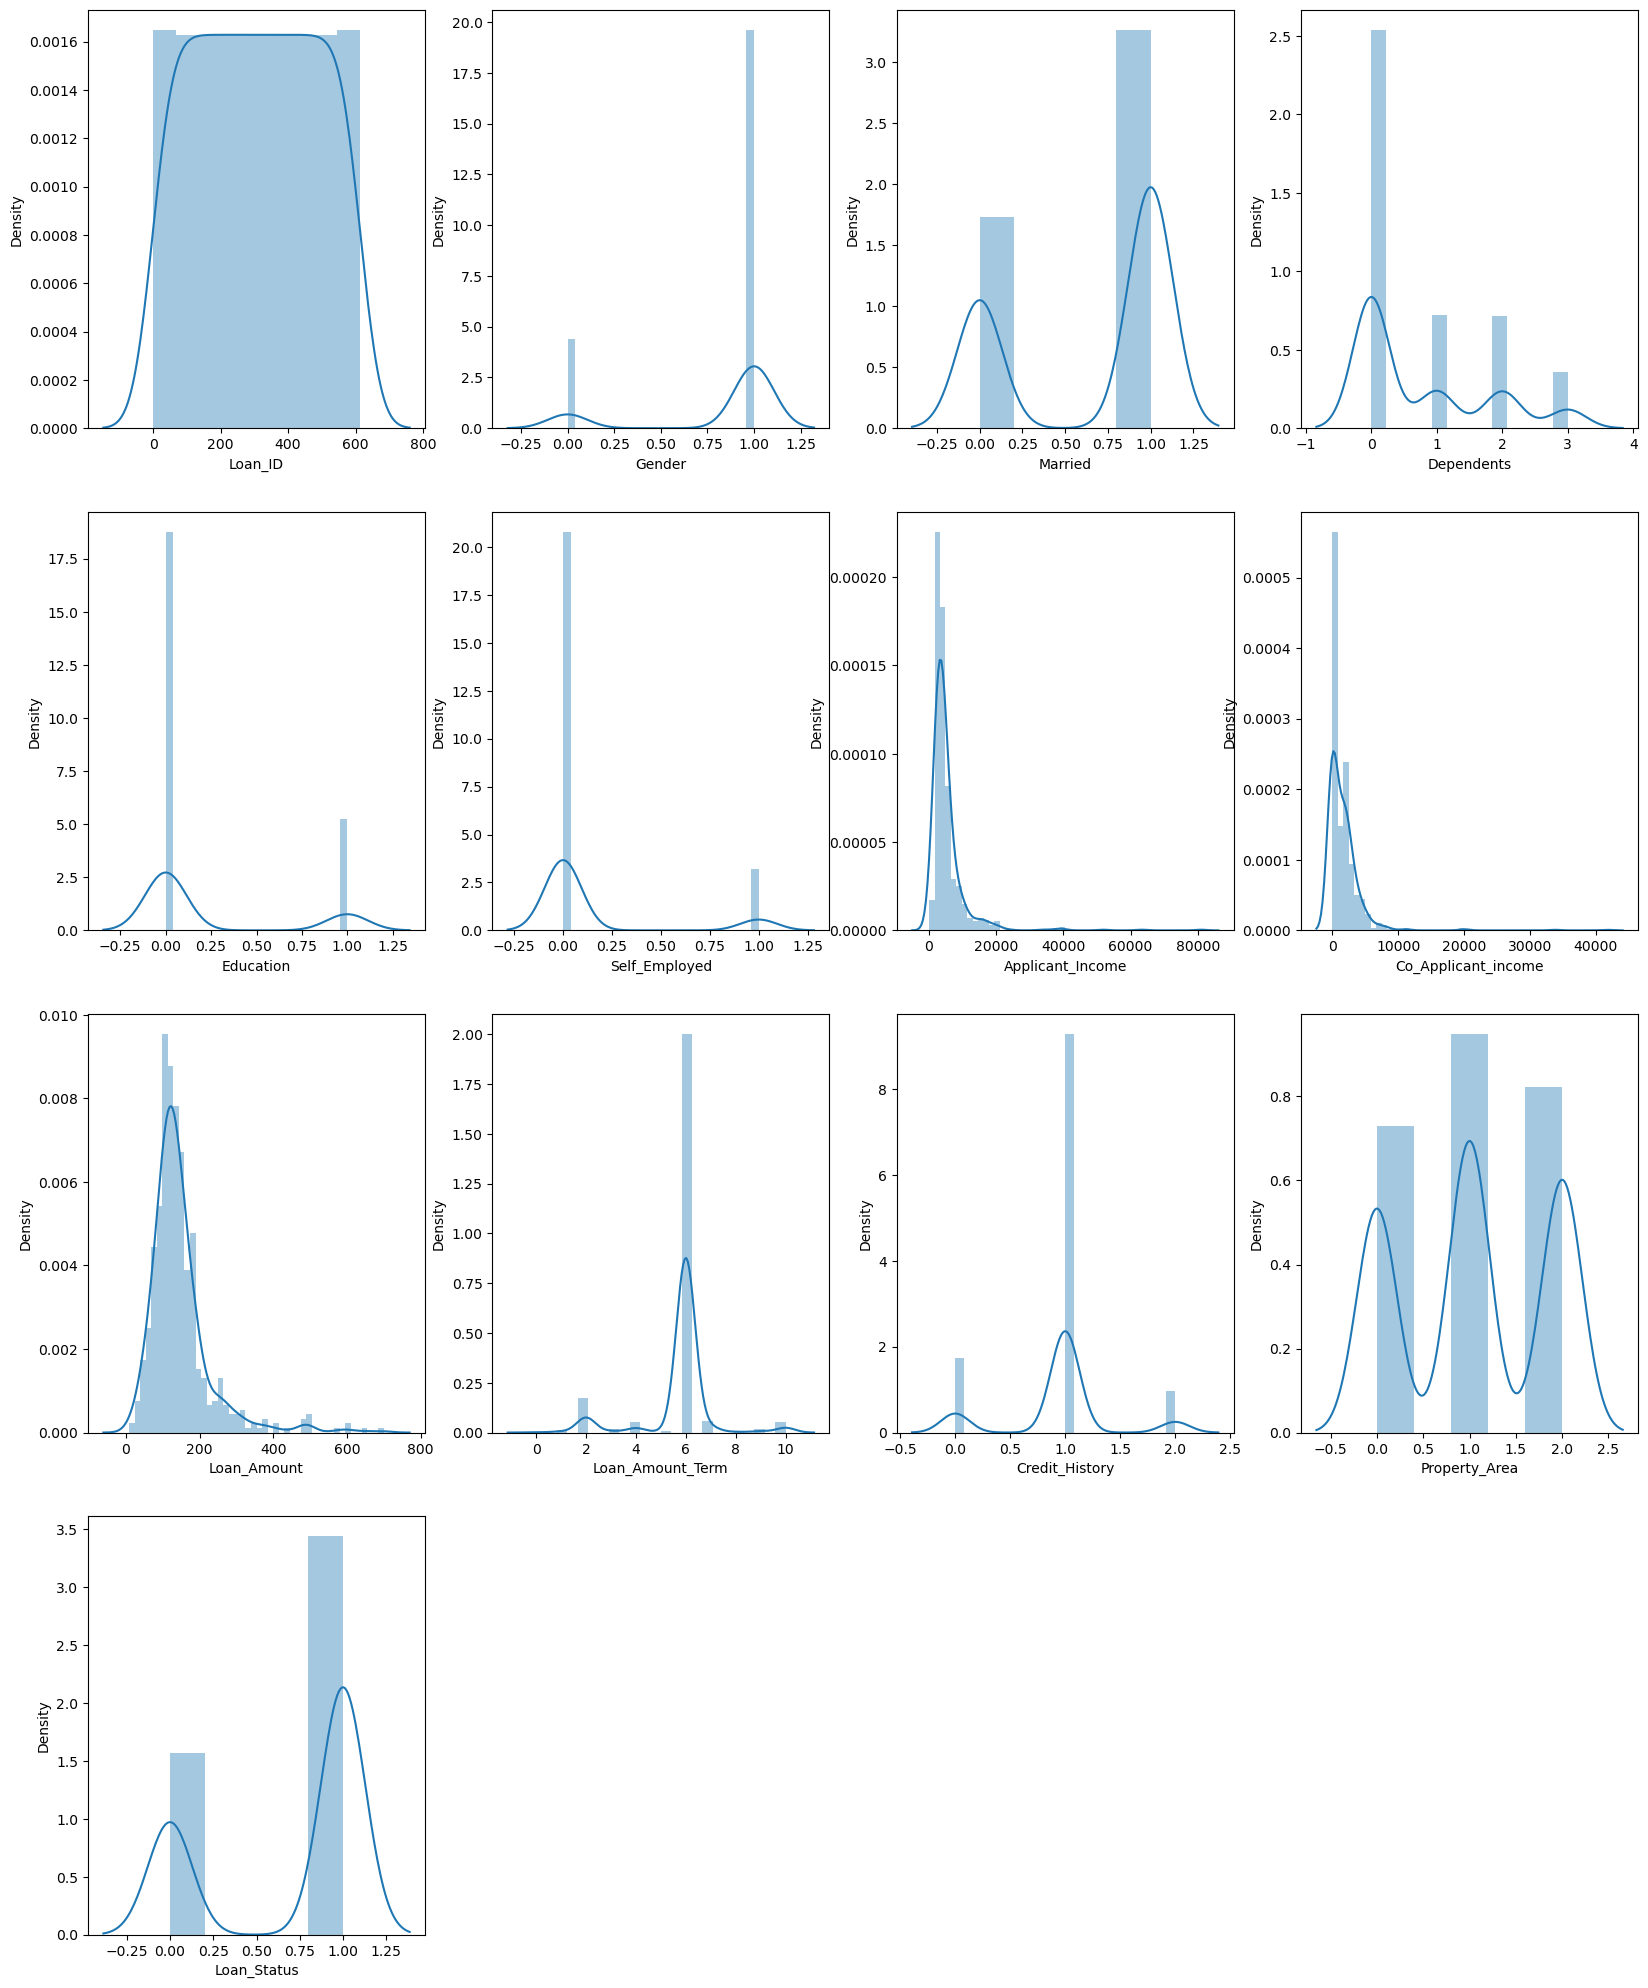

In [25]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the distplots that skewness is present in some of them 
# right skewed data are :- (Dependents , Education , Self_Employed , ) , Applicant_Income , Co_Applicant_Income , Loan_Amount
# left skewed data are :-  (Gender , Married ,Credit_Hostory ,Loan_Status) , Loan_Amount_Term 
# (brackets column represents categorical data column)
# (don't have to change skewness of these )

In [43]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()

Loan_ID                0.000000
Gender                -1.648795
Married               -0.644850
Dependents             1.015551
Education              1.367622
Self_Employed          2.159796
Applicant_Income       6.539513
Co_Applicant_income    7.491531
Loan_Amount            2.726601
Loan_Amount_Term      -1.102014
Credit_History        -0.199751
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

In [44]:
#removing skewness using cuberoot method
df['Applicant_Income']=np.cbrt(df['Applicant_Income'])
df['Co_Applicant_income']=np.cbrt(df['Co_Applicant_income'])
df['Loan_Amount']=np.cbrt(df['Loan_Amount'])
# Loan_Amount_Term column skewness is increasing so it's better to not remove it's skewness

In [45]:
df.skew()

Loan_ID                0.000000
Gender                -1.648795
Married               -0.644850
Dependents             1.015551
Education              1.367622
Self_Employed          2.159796
Applicant_Income       2.083638
Co_Applicant_income    0.196726
Loan_Amount            0.832841
Loan_Amount_Term      -1.102014
Credit_History        -0.199751
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

In [46]:
df['Applicant_Income']=np.cbrt(df['Applicant_Income'])
df['Loan_Amount']=np.cbrt(df['Loan_Amount'])


In [47]:
df.skew()

Loan_ID                0.000000
Gender                -1.648795
Married               -0.644850
Dependents             1.015551
Education              1.367622
Self_Employed          2.159796
Applicant_Income       1.030738
Co_Applicant_income    0.196726
Loan_Amount            0.151313
Loan_Amount_Term      -1.102014
Credit_History        -0.199751
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

In [48]:
df['Applicant_Income']=np.cbrt(df['Applicant_Income'])

In [49]:
df.skew()

Loan_ID                0.000000
Gender                -1.648795
Married               -0.644850
Dependents             1.015551
Education              1.367622
Self_Employed          2.159796
Applicant_Income       0.669805
Co_Applicant_income    0.196726
Loan_Amount            0.151313
Loan_Amount_Term      -1.102014
Credit_History        -0.199751
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

In [50]:
df['Applicant_Income']=np.cbrt(df['Applicant_Income'])

In [51]:
df.skew()

Loan_ID                0.000000
Gender                -1.648795
Married               -0.644850
Dependents             1.015551
Education              1.367622
Self_Employed          2.159796
Applicant_Income       0.543922
Co_Applicant_income    0.196726
Loan_Amount            0.151313
Loan_Amount_Term      -1.102014
Credit_History        -0.199751
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

In [ ]:
# categorical columns skeness should not be removed

# CHECKING FOR OUTLIERS

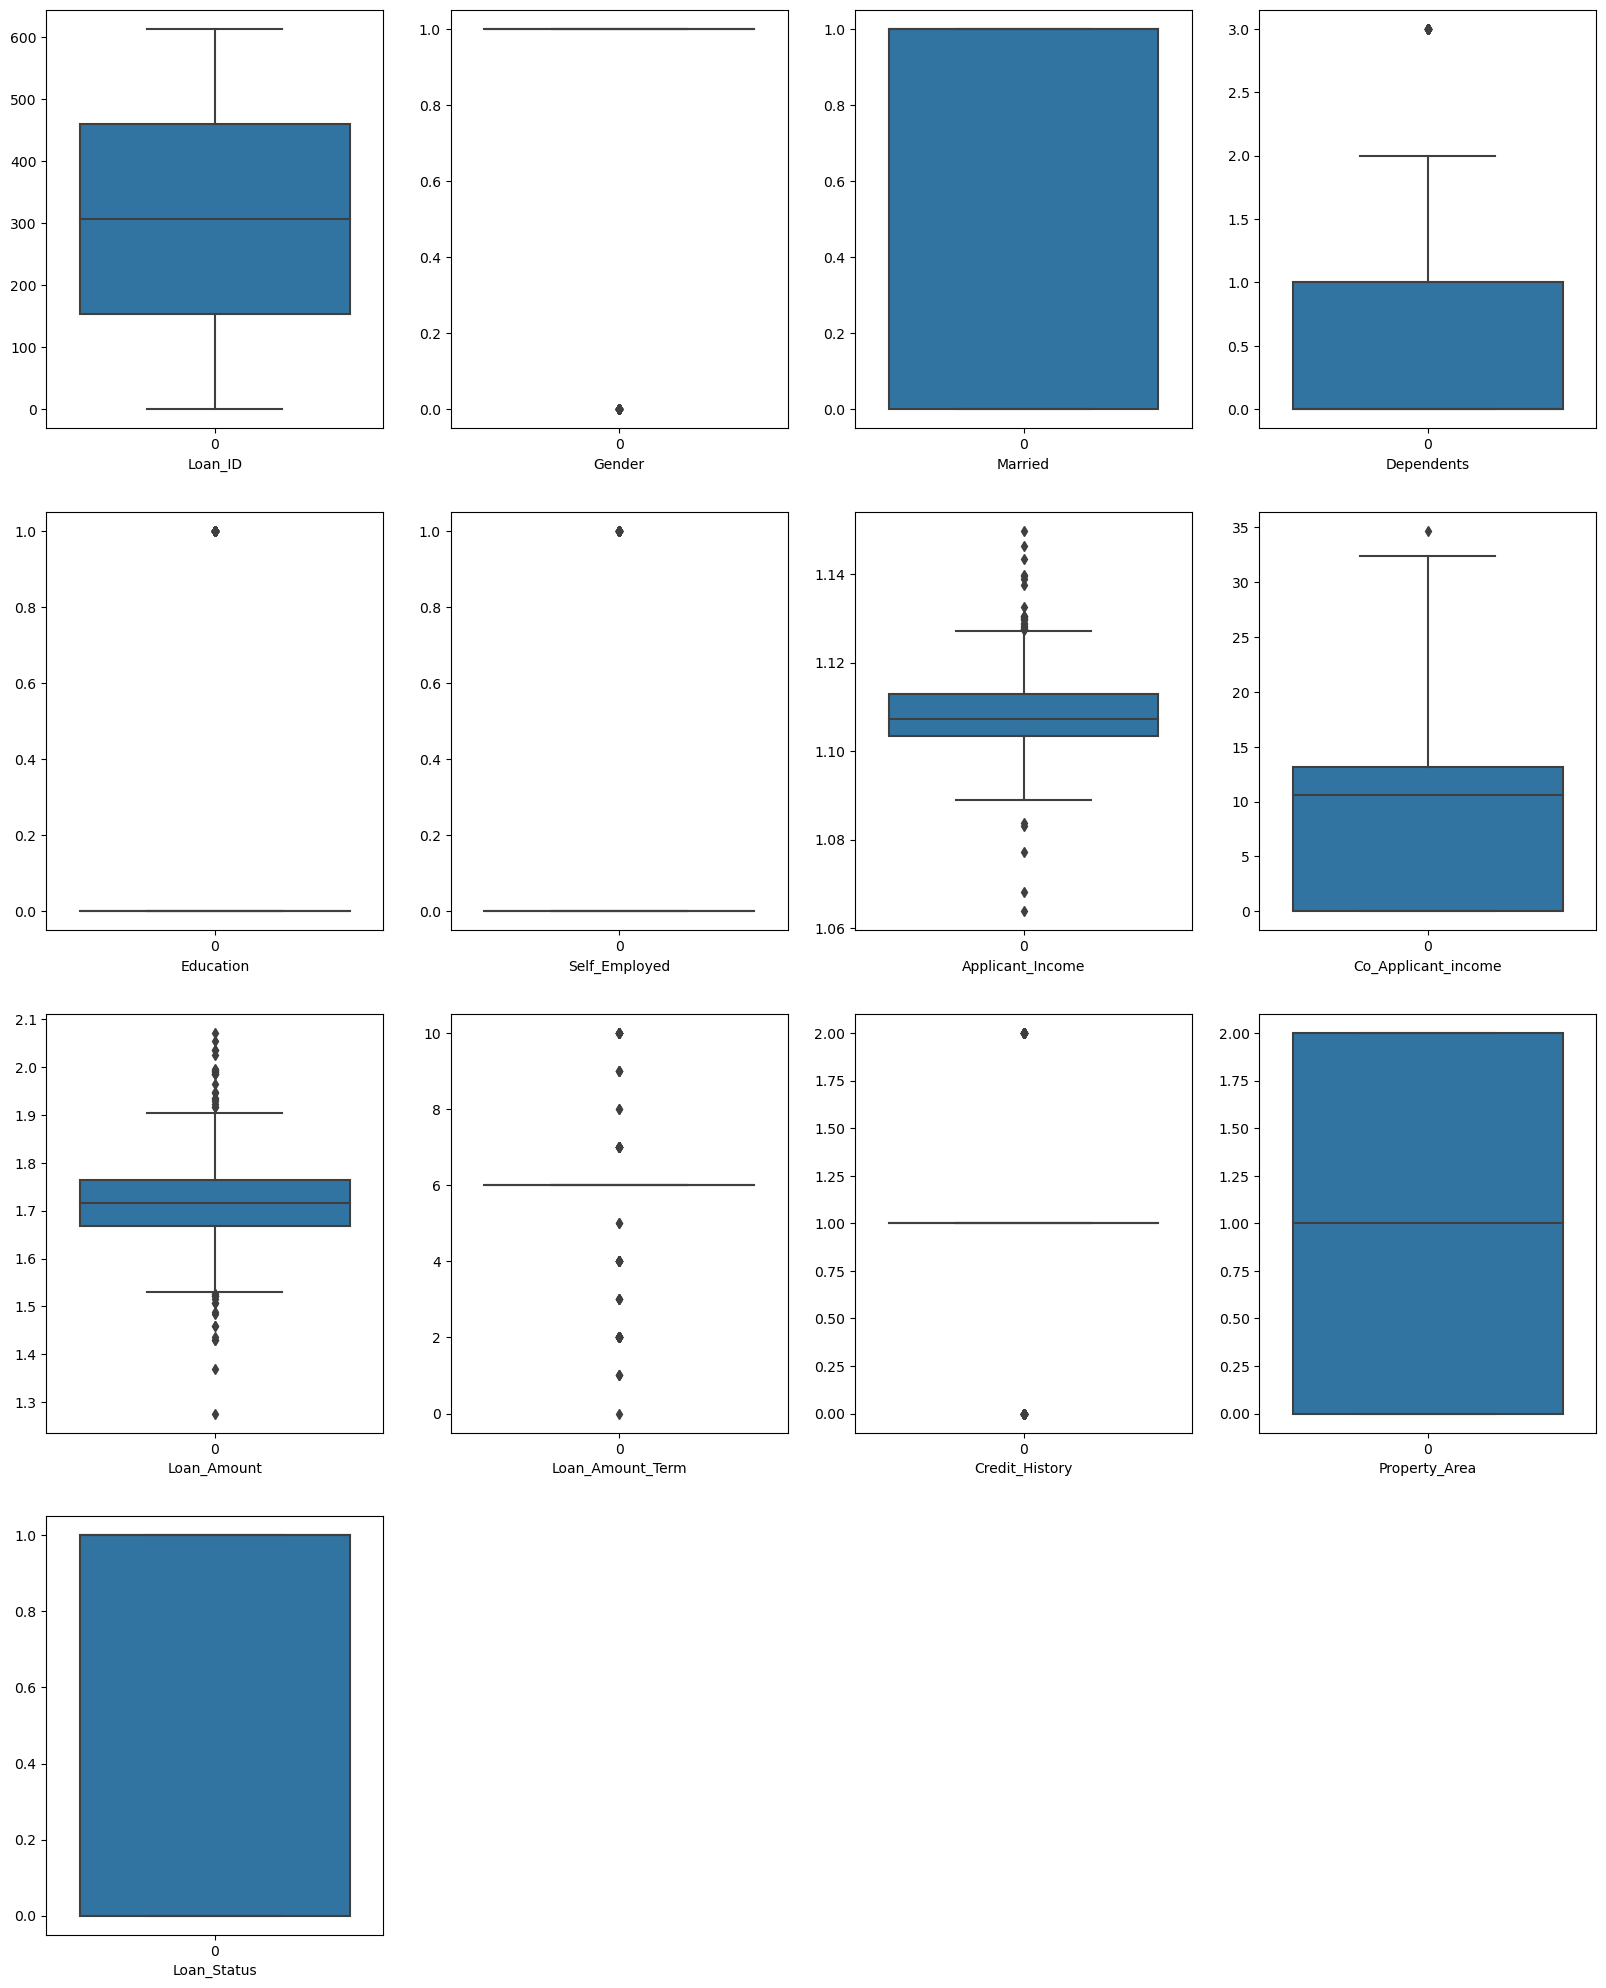

In [53]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from these boxplots that there are outliers present in the columns
# outliers are present in :- (Gender , Dependents , Education , Self_Employed , Credit_History) , Applicant_Income , 
# Co_Applicant_Income , Loan_Amount , Loan_Amount_Term 
# aside from categorical columns outliers are present in Applicant_Income , Co_Applicant_Income , Loan_Amount ,
# Loan_Amount_Term 

In [54]:
#removing outliers
from scipy.stats import zscore
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co_Applicant_income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [55]:
c=df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co_Applicant_income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']]
z=np.abs(zscore(c))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.512243,1.053225,0.225235,0.178403,0.134703,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.133700,0.561256,0.047780,0.178403,0.134703,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.521213,1.053225,1.335369,0.178403,0.134703,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.751704,0.820678,0.177444,0.178403,0.134703,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.551865,1.053225,0.148308,0.178403,0.134703,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.573462,1.053225,1.198019,0.178403,0.134703,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.036492,1.053225,2.247820,2.742651,0.134703,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,1.013917,0.178302,1.379390,0.178403,0.134703,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.916438,1.053225,0.732883,0.178403,0.134703,1.223298,0.674519


In [56]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([ 14,  14,  19,  36,  44,  45,  73,  94,  94, 112, 130, 133, 133,
        155, 155, 165, 171, 171, 183, 185, 197, 216, 223, 232, 333, 335,
        367, 369, 409, 421, 423, 443, 468, 497, 561, 568, 581, 600, 600],
       dtype=int64),
 array([8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 8, 9, 6, 8, 9, 6, 8, 6, 6, 9, 6,
        9, 9, 6, 9, 9, 8, 6, 9, 9, 6, 6, 9, 8, 8, 7, 6, 7], dtype=int64))

In [66]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (614, 13)
DataFrame Shape after Removing Outliers: (581, 13)


In [67]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 5.37% we lose 5.37% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

5.374592833876222

# CHECK FOR CORRELATION AND MULTICOLLINEARTY

In [68]:
df1.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.005725,-0.001363,0.047891,0.054314,0.043198,0.027830,-0.035561,0.024452,-0.006691,-0.030835,-0.162309,0.028924
Gender,-0.005725,1.000000,0.361556,0.189351,0.062639,-0.003516,0.045238,0.228966,0.153115,-0.094877,-0.001389,-0.007340,0.015991
Married,-0.001363,0.361556,1.000000,0.342126,0.024619,-0.006180,-0.003643,0.303648,0.182499,-0.098036,0.047952,0.014790,0.092102
Dependents,0.047891,0.189351,0.342126,1.000000,0.061994,0.077548,0.118642,0.002222,0.141863,-0.058246,-0.035403,-0.000448,0.017519
Education,0.054314,0.062639,0.024619,0.061994,1.000000,-0.005969,-0.176874,0.016579,-0.142344,-0.112916,-0.023554,-0.065137,-0.092092
Self_Employed,0.043198,-0.003516,-0.006180,0.077548,-0.005969,1.000000,0.197242,-0.070305,0.125845,-0.006747,-0.017016,-0.038737,-0.028581
Applicant_Income,0.027830,0.045238,-0.003643,0.118642,-0.176874,0.197242,1.000000,-0.346611,0.497777,-0.032404,0.011989,-0.032134,-0.011241
Co_Applicant_income,-0.035561,0.228966,0.303648,0.002222,0.016579,-0.070305,-0.346611,1.000000,0.208074,-0.005360,0.019765,-0.059223,0.052368
Loan_Amount,0.024452,0.153115,0.182499,0.141863,-0.142344,0.125845,0.497777,0.208074,1.000000,0.079606,0.006648,-0.085585,-0.051792
Loan_Amount_Term,-0.006691,-0.094877,-0.098036,-0.058246,-0.112916,-0.006747,-0.032404,-0.005360,0.079606,1.000000,0.071394,-0.064750,0.019727


<Axes: >

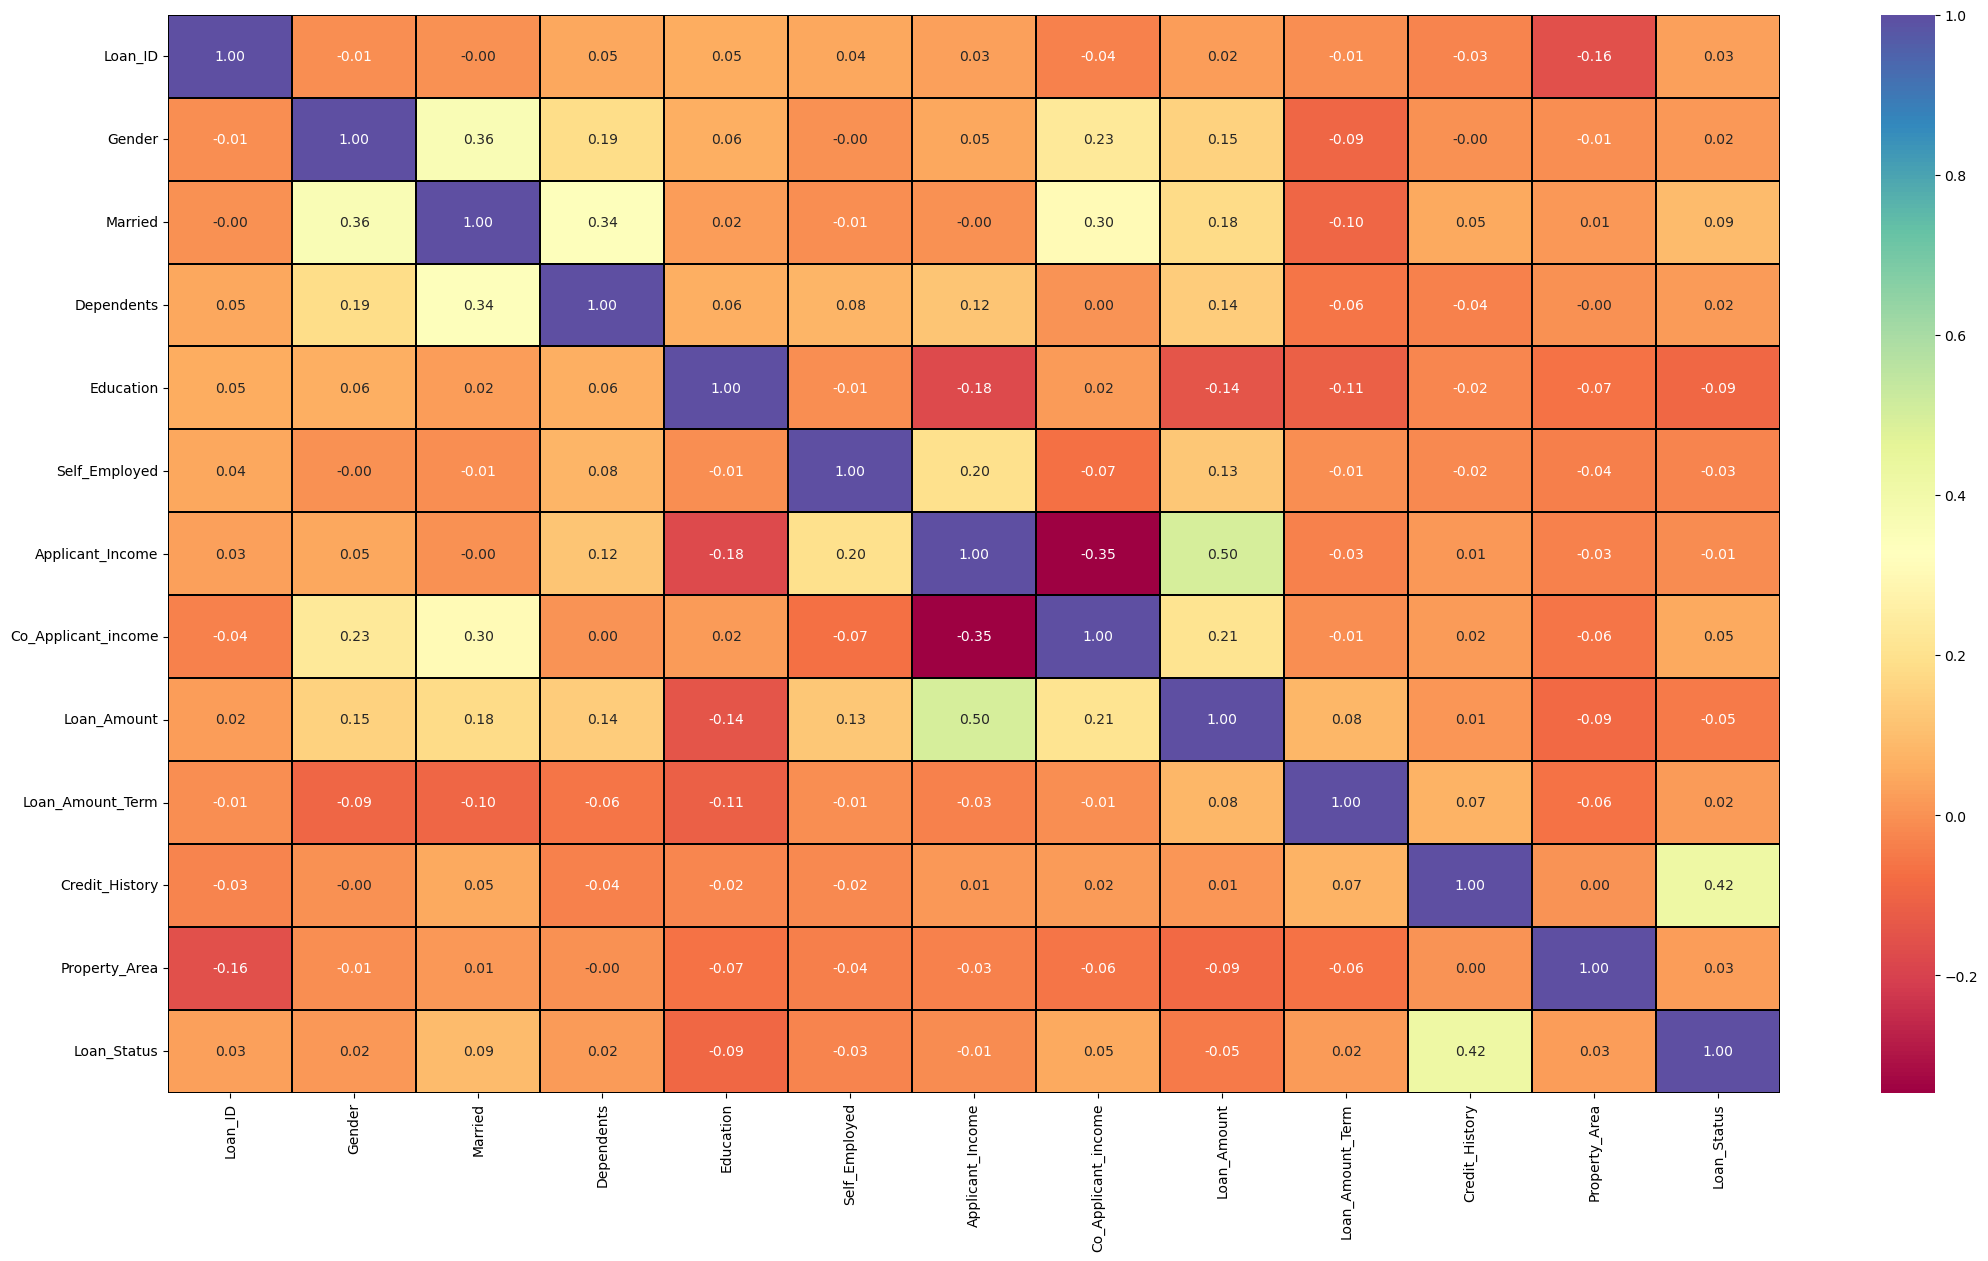

In [69]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there is some correlation b/w some columns like Applicant_Income and Loan_Amount(0.50) etc
# 3) Loan_Status which is label/target have also low correlation to other columns except for Credit_History(0.42)

In [71]:
x=df1.drop('Loan_Status',axis=1)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,1.113031,0.000000,1.740282,6.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.109684,11.467457,1.714488,6.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,1.103894,0.000000,1.592838,6.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.101856,13.310098,1.702237,6.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,1.113381,0.000000,1.733014,6.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,1.103432,0.000000,1.605814,6.0,1.0,0.0
610,610.0,1.0,1.0,3.0,0.0,0.0,1.108179,0.000000,1.506630,2.0,1.0,0.0
611,611.0,1.0,1.0,1.0,0.0,0.0,1.117466,6.214465,1.849326,6.0,1.0,2.0
612,612.0,1.0,1.0,2.0,0.0,0.0,1.116604,0.000000,1.788244,6.0,1.0,2.0


In [72]:
y=df1['Loan_Status']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 581, dtype: float64

In [73]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=pd.DataFrame(s.fit_transform(x),columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.746270,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,0.629471,-1.070018,0.259717,0.260721,0.125657,1.239982
1,-1.740615,0.469668,0.730056,0.252403,-0.526235,-0.387937,0.185411,0.580693,-0.042376,0.260721,0.125657,-1.305706
2,-1.734959,0.469668,0.730056,-0.745190,-0.526235,2.577739,-0.582855,-1.070018,-1.467098,0.260721,0.125657,1.239982
3,-1.729303,0.469668,0.730056,-0.745190,1.900292,-0.387937,-0.853239,0.845936,-0.185849,0.260721,0.125657,1.239982
4,-1.723647,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,0.675951,-1.070018,0.174597,0.260721,0.125657,1.239982
...,...,...,...,...,...,...,...,...,...,...,...,...
576,1.698094,-2.129163,-1.369758,-0.745190,-0.526235,-0.387937,-0.644147,-1.070018,-1.315119,0.260721,0.125657,-1.305706
577,1.703750,0.469668,0.730056,2.247589,-0.526235,-0.387937,-0.014238,-1.070018,-2.476729,-3.262044,0.125657,-1.305706
578,1.709406,0.469668,0.730056,0.252403,-0.526235,-0.387937,1.217975,-0.175462,1.536793,0.260721,0.125657,1.239982
579,1.715061,0.469668,0.730056,1.249996,-0.526235,-0.387937,1.103624,-1.070018,0.821431,0.260721,0.125657,1.239982


In [74]:
# vif factor is checked for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.035810,Loan_ID
1,1.204421,Gender
2,1.383001,Married
3,1.185530,Dependents
4,1.074499,Education
5,1.048861,Self_Employed
6,1.956313,Applicant_Income
7,1.622804,Co_Applicant_income
8,1.765660,Loan_Amount
9,1.060176,Loan_Amount_Term


In [ ]:
# since vif values for all the columns are low we don't have to remove any columns fortunately

In [75]:
y.value_counts()

Loan_Status
1.0    402
0.0    179
Name: count, dtype: int64

# EQUALING THE DATA

In [76]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [77]:
x1,y1=sm.fit_resample(x,y)

In [78]:
x1
# rows have been increased to 804

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.746270,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,0.629471,-1.070018,0.259717,0.260721,0.125657,1.239982
1,-1.740615,0.469668,0.730056,0.252403,-0.526235,-0.387937,0.185411,0.580693,-0.042376,0.260721,0.125657,-1.305706
2,-1.734959,0.469668,0.730056,-0.745190,-0.526235,2.577739,-0.582855,-1.070018,-1.467098,0.260721,0.125657,1.239982
3,-1.729303,0.469668,0.730056,-0.745190,1.900292,-0.387937,-0.853239,0.845936,-0.185849,0.260721,0.125657,1.239982
4,-1.723647,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,0.675951,-1.070018,0.174597,0.260721,0.125657,1.239982
...,...,...,...,...,...,...,...,...,...,...,...,...
799,-1.202569,0.469668,0.730056,-0.745190,1.900292,-0.387937,0.929053,-1.070018,-0.074510,0.260721,-1.071166,1.239982
800,-0.047302,-2.129163,-1.369758,-0.745190,-0.526235,0.993938,1.358244,-1.070018,1.030226,0.260721,0.125657,-0.625951
801,-0.482713,-2.129163,-1.369758,-0.745190,-0.526235,-0.387937,0.344522,-1.070018,0.064413,0.873783,-2.021604,0.853184
802,0.369887,-2.129163,-1.369758,-0.745190,-0.526235,-0.387937,-0.602204,-0.635349,-1.115165,0.260721,-2.021604,1.239982


In [79]:
y1
# rows ahve been increased to 804

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
799    0.0
800    0.0
801    0.0
802    0.0
803    0.0
Name: Loan_Status, Length: 804, dtype: float64

In [80]:
y1.value_counts()

Loan_Status
1.0    402
0.0    402
Name: count, dtype: int64

# MODEL BUILDING FOR CLASSIFICATION

# WITH USING SMOTE(EQUALISING THE DATA)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [96]:
maxaccu1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x1_train,y1_train)
    pred1=rfr.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxaccu1:
        maxaccu1=acc1
        maxrs1=i
print('best accuracy is',maxaccu1,'at random state',maxrs1)

best accuracy is 0.9008264462809917 at random state 6


In [83]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [97]:
#random forest classifier
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=6)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predrfc1))
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification',classification_report(y1_test,predrfc1))

accuracy score 0.8842975206611571
confusion matrix [[ 98  21]
 [  7 116]]
classification               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       119
         1.0       0.85      0.94      0.89       123

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.89      0.88      0.88       242



In [98]:
lr= LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print(accuracy_score(y1_test,predlr1))
print(confusion_matrix(y1_test,predlr1))
print(classification_report(y1_test,predlr1))

0.731404958677686
[[83 36]
 [29 94]]
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       119
         1.0       0.72      0.76      0.74       123

    accuracy                           0.73       242
   macro avg       0.73      0.73      0.73       242
weighted avg       0.73      0.73      0.73       242



In [99]:
svc= SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.7768595041322314
[[ 86  33]
 [ 21 102]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       119
         1.0       0.76      0.83      0.79       123

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242



In [100]:
gbc= GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.8264462809917356
[[ 87  32]
 [ 10 113]]
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81       119
         1.0       0.78      0.92      0.84       123

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.82       242
weighted avg       0.84      0.83      0.82       242



In [101]:
abc= AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.7975206611570248
[[ 87  32]
 [ 17 106]]
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       119
         1.0       0.77      0.86      0.81       123

    accuracy                           0.80       242
   macro avg       0.80      0.80      0.80       242
weighted avg       0.80      0.80      0.80       242



In [102]:
bc= BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.8388429752066116
[[100  19]
 [ 20 103]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       119
         1.0       0.84      0.84      0.84       123

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [103]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.8966942148760331
[[102  17]
 [  8 115]]
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89       119
         1.0       0.87      0.93      0.90       123

    accuracy                           0.90       242
   macro avg       0.90      0.90      0.90       242
weighted avg       0.90      0.90      0.90       242



In [104]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore1=cvs(rfc,x1,y1)
print(rfcscore1)
print(rfcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.37888199 0.36645963 0.76397516 0.73913043 0.4625    ]
0.5421894409937889
differnce b/w accuracy score and cross val score 0.3421080796673682


In [105]:
lrscore1=cvs(lr,x1,y1)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.60869565 0.53416149 0.73913043 0.66459627 0.55      ]
0.6193167701863354
differnce b/w accuracy score and cross val score 0.1120881884913506


In [106]:
svcscore1=cvs(svc,x1,y1)
print(svcscore1)
print(svcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.71428571 0.65838509 0.80745342 0.7826087  0.6       ]
0.7125465838509316
differnce b/w accuracy score and cross val score 0.06431292028129976


In [107]:
gbcscore1=cvs(gbc,x1,y1)
print(gbcscore1)
print(gbcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.39751553 0.25465839 0.44720497 0.57142857 0.475     ]
0.42916149068322984
differnce b/w accuracy score and cross val score 0.3972847903085057


In [108]:
abcscore1=cvs(abc,x1,y1)
print(abcscore1)
print(abcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.31055901 0.27329193 0.39130435 0.45962733 0.4125    ]
0.3694565217391304
differnce b/w accuracy score and cross val score 0.4280641394178944


In [109]:
bcscore1=cvs(bc,x1,y1)
print(bcscore1)
print(bcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.40372671 0.29813665 0.45962733 0.72670807 0.49375   ]
0.476389751552795
differnce b/w accuracy score and cross val score 0.36245322365381655


In [110]:
etcscore1=cvs(etc,x1,y1)
print(etcscore1)
print(etcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.70807453 0.68944099 0.86956522 0.86956522 0.6125    ]
0.7498291925465838
differnce b/w accuracy score and cross val score 0.1468650223294493


In [ ]:
#                                                 rfc       lr      svc       gbc      abc      bc     etc
# accuracy score(%)                              88.42    73.14    77.68     82.64   79.75    83.88    89.66    
# cvs score(%)                                   54.21    61.93    71.25     42.91   36.94    47.63    74.98
# difference b/w accuracy score and cvs score(%) 34.21    11.20    6.431     39.72   42.80    36.24    14.68

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 89.66 and cvs score is 74.98 and difference is 14.68
#    etc accuracy and cvs score is more than any other model and difference is also less compared to other models except svc but
#    it's accuracy score and cvs score is more than svc
# 2) other best model can be svc as it's accuracy score and cvs score is better than other models
# 3) there is a lot of errors and overfitting that's why cvs score is less for most of the models

# MODEL BUILDING WITHOUT EQUALIZING THE DATA(WITHOUT USING SMOTE)

In [111]:
maxaccu1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr= RandomForestClassifier()
    rfr.fit(x1_train,y1_train)
    pred1=rfr.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxaccu1:
        maxaccu1=acc1
        maxrs1=i
print('best accuracy is',maxaccu1,'at random state',maxrs1)

best accuracy is 0.8628571428571429 at random state 162


In [113]:
#random forest classifier
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.30,random_state=162)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predrfc1))
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification',classification_report(y1_test,predrfc1))

accuracy score 0.8514285714285714
confusion matrix [[ 26  17]
 [  9 123]]
classification               precision    recall  f1-score   support

         0.0       0.74      0.60      0.67        43
         1.0       0.88      0.93      0.90       132

    accuracy                           0.85       175
   macro avg       0.81      0.77      0.79       175
weighted avg       0.85      0.85      0.85       175



In [114]:
lr= LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print(accuracy_score(y1_test,predlr1))
print(confusion_matrix(y1_test,predlr1))
print(classification_report(y1_test,predlr1))

0.8685714285714285
[[ 24  19]
 [  4 128]]
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68        43
         1.0       0.87      0.97      0.92       132

    accuracy                           0.87       175
   macro avg       0.86      0.76      0.80       175
weighted avg       0.87      0.87      0.86       175



In [115]:
svc= SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.8628571428571429
[[ 22  21]
 [  3 129]]
              precision    recall  f1-score   support

         0.0       0.88      0.51      0.65        43
         1.0       0.86      0.98      0.91       132

    accuracy                           0.86       175
   macro avg       0.87      0.74      0.78       175
weighted avg       0.86      0.86      0.85       175



In [116]:
gbc= GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.7942857142857143
[[ 25  18]
 [ 18 114]]
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58        43
         1.0       0.86      0.86      0.86       132

    accuracy                           0.79       175
   macro avg       0.72      0.72      0.72       175
weighted avg       0.79      0.79      0.79       175



In [117]:
abc= AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.7828571428571428
[[ 27  16]
 [ 22 110]]
              precision    recall  f1-score   support

         0.0       0.55      0.63      0.59        43
         1.0       0.87      0.83      0.85       132

    accuracy                           0.78       175
   macro avg       0.71      0.73      0.72       175
weighted avg       0.79      0.78      0.79       175



In [118]:
bc= BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.8114285714285714
[[ 29  14]
 [ 19 113]]
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.64        43
         1.0       0.89      0.86      0.87       132

    accuracy                           0.81       175
   macro avg       0.75      0.77      0.75       175
weighted avg       0.82      0.81      0.81       175



In [119]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.8342857142857143
[[ 26  17]
 [ 12 120]]
              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64        43
         1.0       0.88      0.91      0.89       132

    accuracy                           0.83       175
   macro avg       0.78      0.76      0.77       175
weighted avg       0.83      0.83      0.83       175



In [120]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score
rfcscore1=cvs(rfc,x,y)
print(rfcscore1)
print(rfcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.73504274 0.75       0.78448276 0.82758621 0.80172414]
0.7797671676982022
differnce b/w accuracy score and cross val score 0.07166140373036922


In [121]:
lrscore1=cvs(lr,x,y)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.8034188  0.79310345 0.78448276 0.84482759 0.82758621]
0.8106837606837607
differnce b/w accuracy score and cross val score 0.05788766788766786


In [122]:
svcscore1=cvs(svc,x,y)
print(svcscore1)
print(svcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.8034188  0.78448276 0.78448276 0.82758621 0.8362069 ]
0.8072354848216916
differnce b/w accuracy score and cross val score 0.05562165803545127


In [123]:
gbcscore1=cvs(gbc,x,y)
print(gbcscore1)
print(gbcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.52136752 0.65517241 0.78448276 0.80172414 0.6637931 ]
0.6853079870321249
differnce b/w accuracy score and cross val score 0.10897772725358934


In [124]:
abcscore1=cvs(abc,x,y)
print(abcscore1)
print(abcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.60683761 0.69827586 0.80172414 0.81896552 0.6637931 ]
0.7179192455054524
differnce b/w accuracy score and cross val score 0.06493789735169042


In [125]:
bcscore1=cvs(bc,x,y)
print(bcscore1)
print(bcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.56410256 0.70689655 0.75862069 0.79310345 0.69827586]
0.7041998231653404
differnce b/w accuracy score and cross val score 0.10722874826323103


In [126]:
etcscore1=cvs(etc,x,y)
print(etcscore1)
print(etcscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.76068376 0.74137931 0.79310345 0.75862069 0.75862069]
0.762481579722959
differnce b/w accuracy score and cross val score 0.07180413456275525


In [ ]:
#                                                 rfc       lr      svc       gbc      adc      bc     etc
# accuracy score(%)                              85.14    86.85    86.28     79.42   78.28    81.14    83.42    
# cvs score(%)                                   77.97    81.06    80.72     68.53   71.79    70.41    76.24
# difference b/w accuracy score and cvs score(%) 7.166    5.788    5.562     10.89   6.493    10.72    7.180

In [ ]:
# 1) best model comes out to be svc as the accuracy score is 86.28 and cvs score is 80.72 and difference is 5.562
#    etc accuracy and cvs score is more than any other model(except lr) but difference is also less compared to lr and 
#    other models
# 2) other best model can be lr as it's accuracy score and cvs score is highest than any other model and difference b/w accuracy
#    and cvs score is only 2nd to svc. other models can be etc , rfc
# 3) model is build good there are less errors and the prediction is good as well

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [128]:
import joblib
joblib.dump(svc,'Loan Application Status Prediction')

['Loan Application Status Prediction']

In [129]:
model=joblib.load('Loan Application Status Prediction')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [130]:
x1_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
516,1.336125,0.469668,0.730056,-0.745190,-0.526235,-0.387937,-0.728329,0.728365,0.389209,0.260721,0.125657,-1.305706
420,0.781859,0.469668,0.730056,-0.745190,-0.526235,-0.387937,-0.283759,0.531051,-1.841202,0.260721,0.125657,-1.305706
205,-0.490689,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,-0.600419,0.956687,0.222131,0.260721,0.125657,-0.032862
140,-0.897905,0.469668,-1.369758,-0.745190,-0.526235,-0.387937,0.758290,-1.070018,-0.223044,0.260721,-2.021604,-1.305706
353,0.380299,0.469668,0.730056,2.247589,-0.526235,-0.387937,1.365687,1.390792,-0.007755,0.260721,0.125657,-1.305706
...,...,...,...,...,...,...,...,...,...,...,...,...
510,1.302190,0.469668,0.730056,2.247589,-0.526235,-0.387937,0.798549,-1.070018,0.418448,-3.262044,0.125657,-1.305706
456,0.991123,0.469668,0.730056,1.249996,-0.526235,-0.387937,1.276239,-1.070018,1.469377,0.260721,0.125657,-0.032862
65,-1.350366,0.469668,0.730056,-0.745190,-0.526235,-0.387937,-0.461584,1.021177,0.627760,0.260721,0.125657,1.239982
418,0.770548,0.469668,0.730056,0.252403,-0.526235,2.577739,-0.321521,0.463889,-0.007755,0.260721,0.125657,-1.305706


In [132]:
y.value_counts()

Loan_Status
1.0    402
0.0    179
Name: count, dtype: int64

In [ ]:
# 1 meaning loan is approved and 0 means loan is not approved